<a href="https://colab.research.google.com/github/GiorgioMorales/LinearRegression/blob/main/Presentation_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>CSCI 550: Class Presentation.                                 
Kyle Webster and Giorgio Morales

# Linear Regression

## 1. Introduction

Given a set of $n$ **independet variables**: $X_1, X_2, ..., X_n$ and a real-valued **dependant variable** $Y$ (or response variable), the goal of the linear regression problem is to find a **regression function** $f$ such that:

> $Y = f(X_1, X_2, ..., X_n) + \epsilon = f(X) + \epsilon$

where $\epsilon$ is the error term, which is independent of $X$, and accounts for the uncertainty inherent in $Y$.

## 2. Linear Regression Model

The regression function $f$ can be expressed based on the multivariate random variable $X$ and its parameters as follows:

> $ f(X) = \beta + \omega_1X_1 + \omega_2X_2 + ... + \omega_nX_n = \beta + \sum_{i=1}^{n}\omega_iX_i = \beta + \omega^T X $

where:

* $\beta$: bias.
* $\omega_i$: regression coefficient or weight for $X_i$.
* $\omega = (\omega_1, \omega_2, ..., \omega_3)^T$ .

**Note:**
* If $n=1$, $f$ represents a line with slope $\omega_i$ and offset $\beta$
* In general: $f$ represents a hyperplane, $\omega$ is the vector notmal to the hyperplane and $\beta$ is the offset.

><div>
<img src="https://www.cs.montana.edu/~moralesluna/images/linear/plane.jpg" width="500"/>
</div>

In practice, the parameters $\beta$ and $\omega$ are **unkown**, so the idea is to estimate them from a training set $D$ consisting of $N$ points $x_i \in \mathbb{R}^n$. Let $b$ denote the estimated value of the bias $\beta$, and $\texttt{w}=(w_1, w_2, ..., w_n)^T$ denote the estimated value of the vector $\omega$; then, the estimated dependant variable given a test point $\texttt{x}=(x_1, x_2, ..., x_n)^T$ can be written as:

> $\hat{y} = b + w_1x_1 + w_2x_2 + ... + w_nx_n = \beta + \texttt{w}^T \texttt{x}$

## 2 Bivariate Regression

Let's consider the linear regression problem with only one attribute; i.e., the dataset $D$ consists of points with only one dimension:

> $\hat{y}_i = f(x_i) = b + w \cdot x_i$  

The *residual error* between the estimated value $\hat{y}_i$ and the actual observed response $y_i$ for of the $i$-th data point of $D$ is expressed as:

> $\epsilon_i = y_i - \hat{y}_i$

Since the objective is to minimize the error of our estimation, we can use the *least squares* method to **minimize the sum of aqueared errors**:

> $\min_{b, w} SSE = \sum_{i=1}^n \epsilon_i^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n (y_i - b - w\cdot x_i)^2$

In order to solve this objective, we differentiate it w.r.t $b$ and $w$, and set the result to 0:

* w.r.t. $b$:

>> $\frac{\partial SSE}{\partial b} = 2 \sum_{i=1}^n (y_i - b - w\cdot x_i)\cdot 1 = 0$

>> $b = \frac{1}{n} \sum_{i=1}^n y_i - w \frac{1}{n} \sum_{i=1}^n x_i$

>> $b = \mu_Y - w \cdot \mu_X$

* w.r.t. $w$:

>> $\frac{\partial SSE}{\partial b} = 2 \sum_{i=1}^n (y_i - b - w\cdot x_i)\cdot x_i = 0$

>> $\sum_{i=1}^n x_iy_i - (\mu_Y \sum_{i=1}^n x_i - w \cdot \mu_X \sum_{i=1}^n x_i) - w \sum_{i=1}^n x_i^2 = 0$

>> $w = \frac{\sum_{i=1}^n (x_i - \mu_X)(y_i - \mu_Y)}{\sum_{i=1}^n(x_i - \mu_X)^2} = \frac{\sigma_{XY}}{\sigma_{X}^2} $

where $\sigma_{XY}$ is the covariance between $X$ and $Y$, and $\sigma_{X}^2$ is the variance of $X$.


## 2.1. Univariate Regression Example

Since we just found a way to estimate the coefficients $w$ and $b$ for the univariate regression problem, let's get our hands dirty with an example. 

For this, we will use the **Iris dataset**. Specifically, we will try to estimate the width of the petal ($Y$) given only the length of the petal ($X$).

First, let's load the dataset:

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now, we will separate the $X$ and $Y$ variables:

In [ ]:
X = iris['petal_length']
Y = iris['petal_width']

print('Shape of the independent variable: ' + str(X.shape))
print('Shape of the dependant variable: ' + str(Y.shape))

Shape of the independent variable: (150,)
Shape of the dependant variable: (150,)


For the sake of visualization, let's plot this set of points:

Text(0, 0.5, 'Petal width')

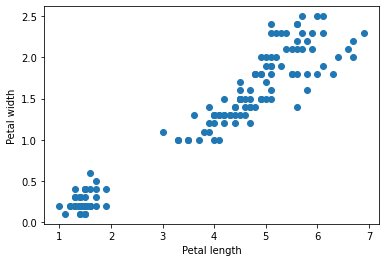

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.xlabel("Petal length")
plt.ylabel("Petal width")

><div>
<img src="https://www.cs.montana.edu/~moralesluna/images/linear/irispetal.png" width="500"/>
</div>

Now, let{s use the expressions for $w$ and $b$ that we found after least squares minimizatoin:

> $b = \mu_Y - w \cdot \mu_X$

> $w = \frac{\sigma_{XY}}{\sigma_{X}^2} $

In [ ]:
import numpy as np

# Get number of samples
N = len(X)

# Calculate means
u_x = np.mean(X)
u_y = np.mean(Y)

# Calculate variance an covariance
varx = np.var(X)
varxy = np.sum((X - u_x) * (Y - u_y)) / N

# Calculate parameters
w = varxy / varx
b = u_y - w * u_x

print("Parameter w = " + str(w))
print("Parameter b = " + str(b))  

Parameter w = 0.41575541635241137
Parameter b = -0.3630755213190291


Once that we obtained our estimated parameters, we can take any test point and estimate its corresponding response variable. Thus, we will plot the estimated petal widths for a range of petal length values between 0 and 8.

Text(0, 0.5, 'Petal width')

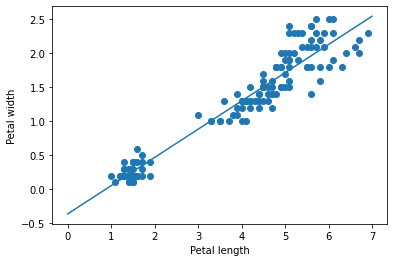

In [ ]:
# Range of petal lengths
xs = range(0, 8)

# Apply the linear regression model
ys = w * xs + b

# Plot the regression function
plt.scatter(X, Y)
plt.plot(xs, ys)
plt.xlabel("Petal length")
plt.ylabel("Petal width")



><div>
<img src="https://www.cs.montana.edu/~moralesluna/images/linear/univariate.png" width="500"/>
</div>

## 3 Multiple Regression 

Now we consider the case where each data point of the training set $D$ contains $n$ attributes: 

> $\hat{y}_i = b + w_1x_{i1} + w_2x_{i2} + ... + w_nx_{in} = \beta + \texttt{w}^T \texttt{x}_i$

Let $b=w_0$ and $x_{i0}=1$, then:

> $\hat{y}_i =  w_0x_{i0} + w_1x_{i1} + w_2x_{i2} + ... + w_nx_{in} = \tilde{\texttt{w}}^T \tilde{\texttt{x}}_i$

Since $i = 1, 2, 3, ..., N$, we can summarize the $N$ equations in just one:

> $\hat{Y} = \tilde{D} \tilde{\texttt{w}}$,

where $\hat{Y}=(\hat{y_1}, \hat{y_2}, ..., \hat{y_n})^T$ and $\tilde{D}$ is the augmented training data sample that includes the artificial constant attribute $X_0$.

**Goal**: To find the best hyperplane defined by $\tilde{\texttt{w}}$ that minimizes the sum of squared errors:

> $\min_{\tilde{\texttt{w}}} SSE = \sum_{i=1}^n \epsilon_i^2 = ||Y - \hat{Y}||^2$

> $=YY^T - 2Y\hat{Y} + \hat{Y}^T\hat{Y}$

> $=YY^T - 2\tilde{\texttt{w}}(\tilde{D}^TY) + \tilde{\texttt{w}}^T(\tilde{D}^T\tilde{D})\tilde{\texttt{w}}$.

Similar to what we have done previously, we need to differentiate $SSE$ w.r.t $\tilde{\texttt{w}}$ and set the result to 0:

> $\frac{\partial}{\partial \tilde{\texttt{w}}}SSE = - 2(\tilde{D}^TY) + 2(\tilde{D}^T\tilde{D})\tilde{\texttt{w}}= 0$

> $\Rightarrow \tilde{\texttt{w}}= (\tilde{D}^T\tilde{D})^{-1}\tilde{D}^TY$

Let's replace $\tilde{\texttt{w}}$ in $\hat{Y} = \tilde{D} \tilde{\texttt{w}}$:

> $\hat{Y} = \tilde{D}(\tilde{D}^T\tilde{D})^{-1}\tilde{D}^TY = H Y$


## 3.1. Multivariate Regression: Example

This time we will use two independent variables from the Iris dataset: Sepal length ($X_1$) and Petal length ($X_2$). Using these variables we will estimate the response variable Petal width ($Y$).

Shape of the first independent variable: (150,)
Shape of the second independent variable: (150,)
Shape of the dependant variable: (150,)


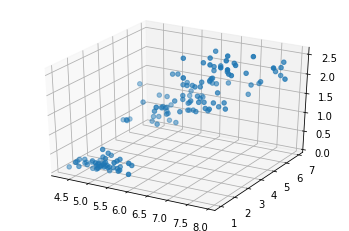

In [ ]:
X1 = iris['sepal_length']
X2 = iris['petal_length']
Y = iris['petal_width']

print('Shape of the first independent variable: ' + str(X1.shape))
print('Shape of the second independent variable: ' + str(X2.shape))
print('Shape of the dependant variable: ' + str(Y.shape))

# Plot the variables
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, Y)

><div>
<img src="https://www.cs.montana.edu/~moralesluna/images/linear/irisgif.gif" width="500"/>
</div>

We can construct now the augmented matrix $\tilde{D}$ including the extra attribute $X_0$ as a column of $1$s:

In [ ]:
# Create column of ones
Ones = np.ones((len(X1),))
# Stack the three columns to form Dtilde
Dt = np.vstack((Ones, X1, X2)).T
print("Showing the first 5 points of Dt:")
print(Dt[:5])

Showing the first 5 points of Dt:
[[1.  5.1 1.4]
 [1.  4.9 1.4]
 [1.  4.7 1.3]
 [1.  4.6 1.5]
 [1.  5.  1.4]]


Having prepared our dataset, we can estimate the parameter vector using the equation: $\tilde{\texttt{w}}= (\tilde{D}^T\tilde{D})^{-1}\tilde{D}^TY$ 

In [ ]:
# Calculate the regression coefficients
wt =  np.linalg.inv(Dt.T.dot(Dt)).dot(Dt.T.dot(Y))

print("Regression coefficients:")
print(wt)

# Print estimated response variable
Yt = Dt.dot(wt)
print("Printing the first 10 estimated values of Yt: ")
print(Yt[:10])

Regression coefficients:
[-0.00899597 -0.08221782  0.44937611]
Printing the first 10 estimated values of Yt: 
[0.2008197  0.21726327 0.18876922 0.28686622 0.20904148 0.31096719
 0.24192861 0.25397909 0.25837218 0.26220088]


Then, the fitted hyperplane can be expressed as:

> $\hat{Y} = -0.0089 - 0.082 X_1 + 0.449 X_2$

Finally, let's plot the regression function:

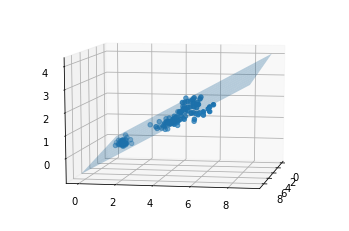

In [ ]:
# Range of petal and sepal lengths
X1s, X2s = np.meshgrid(range(10), range(10))

# Apply the linear regression model
ys = -0.0089 - 0.082 * X1s + 0.449 * X2s

# Plot the dataset and the hyperplane
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, Y)
ax.plot_surface(X1s, X2s, ys, alpha=0.3)
ax.view_init(10,10)

><div>
<img src="https://www.cs.montana.edu/~moralesluna/images/linear/fit3D.gif" width="500"/>
</div>

## 3.2. Geometry of Multiple Regression

What is the column space of a matrix?

Take the matrix $A = \begin{bmatrix}
1 & 2 \\
0 & 3 \\
5 & 6 \\
\end{bmatrix}$. The column space of A is defined as the set of all possible linear combinations of its column vectors; that is, $col(A) = c_1 \begin{bmatrix}
1\\
0\\
5\\
\end{bmatrix} + c_2 \begin{bmatrix}
2\\
3\\
6\\
\end{bmatrix}$, where $c_1$ and $c_2$ are scalars.


Let's look at our linear regression model once again:

> $\hat{Y} = w_0X_0 + w_1X_1 + ... + w_nX_n $.

Then, we can say that the predicted vector $\hat{Y}$ lies in the column space of the augmented dataset $\tilde{D} = \begin{bmatrix}
| & | & ... & |\\
X_0 & X_1 & ... & X_n\\
| & | & ... & |\\
\end{bmatrix}$

><div>
<img src="https://www.cs.montana.edu/~moralesluna/images/linear/geometry.jpg" width="400"/>
</div>

We want to minimize the residual vector error $\epsilon = Y - \hat{Y}$, which is orthogonal to the column space $col(\tilde{D})$. Note that $\epsilon$ is also orthogonal to each of the attributes $X_i$, so:

> $X_i^T\epsilon = 0$

> $X_i^T(Y- \hat{Y}) = 0$

> $w_0X_i^TX_0 + w_1X_i^TX_1 + ... + w_nX_i^TX_n = X_i^TY$

This is called the **normal equation**. Given that we have ($d+1$) independant variables and ($d+1$) unknown weights, the problem can be solved.

We can put all the normal equations in a matrix form:

> $\begin{bmatrix}
X_0^TX_0 & X_0^TX_1 & ... & X_0^TX_n\\
X_1^TX_0 & X_1^TX_1 & ... & X_1^TX_n\\
... & ... & ... & ...\\
X_n^TX_0 & X_n^TX_1 & ... & X_n^TX_n\\
\end{bmatrix} \tilde{\texttt{w}} = \tilde{D}^TY$

> $(\tilde{D}^T\tilde{D})\tilde{\texttt{w}} =\tilde{D}^TY $

>> $\Rightarrow \tilde{\texttt{w}}= (\tilde{D}^T\tilde{D})^{-1}\tilde{D}^TY$

## 3.3. QR-Factorization

The attribute vectors are not necessarily orthogonoal. To obtain the projected vector $\hat{Y}$ we need to construct and orthogonal basis for $col(\tilde{D})$. 

><div>
<img src="https://www.cs.montana.edu/~moralesluna/images/linear/projec.jpg" width="400"/>
</div>

We can construct a set of orthogonal basis vectors $U_1, U_2, ..., U_n$ for $col(\tilde{D})$ using the *Gram-Schmidt orthogonalization* method:

> $ U_0 = X_0$

> $ U_1 = X_1 - p_{10}\cdot U_0$

> $ U_2 = X_2 - p_{20}\cdot U_0 - p_{21}\cdot U_1$

> ...

> $U_d = X_n - p_{n0}\cdot U_0 - p_{n1}\cdot U_1 - ... - p_{n,n-1}\cdot U_{n-1}$

where $p_{ji} = proj_{U_i}(X_j) = \frac{X_j^TU_i}{||U_i||^2}$ represents the scalar projection of $X_j$ onto the basis vector $U_i$.

Now we can rearrange the previous set of equations:

> $ X_0 = U_0$

> $ X_1 = p_{10}\cdot U_0 + U_1$

> $ X_2 = p_{20}\cdot U_0 + p_{21}\cdot U_1 + U_2$

> ...

> $X_d = p_{n0}\cdot U_0 + p_{n1}\cdot U_1 - ... + p_{n,n-1}\cdot U_{n-1} + U_n$

We can also combine all the equations in a matrix form, such that:

> $\tilde{D}=QR$, 

where:

> $Q = \begin{bmatrix}
| & | & ... & |\\
U_0 & U_1 & ... & U_n\\
| & | & ... & |\\
\end{bmatrix}$

and:

> $R = \begin{bmatrix}
1 & p_{10} & p_{20} & ... & p_{n0}\\
0 & 1 & p_{21} & ... & p_{n1}\\
0 & 0 & 1 & ... & p_{n2}\\
... & ... & ... & ... & ...\\
0 & 0 & 0 & ... & 1\\
\end{bmatrix}$

Finally, the estimated response variable $\hat{Y}$ can be expressed as the sum of the projections of the observed response variable $Y$ onto each one of the vectors of the new orthogonal basis:  

> $Y = proj_{U_0}(Y)\cdot U_0 + proj_{U_1}(Y)\cdot U_1 +  ... + proj_{U_n}(Y)\cdot U_n$




## 3.4. Multiple Regression Algorithm

**Note:** (Squared norms)

> $Q^TQ = \Delta = \begin{bmatrix}
||U_0||^2 & 0 & 0 & ... & 0\\
0 & ||U_1||^2 & 0 & ... & 0\\
0 & 0 & ||U_2||^2 & ... & 0\\
... & ... & ... & ... & ...\\
0 & 0 & 0 & ... & ||U_n||^2\\
\end{bmatrix}$ 

In order to solve the regression problem, we can simply use the expression we previously found and replace it using our new basis taking into account that $\tilde{D} = QR$:

> $\tilde{\texttt{w}}= (\tilde{D}^T\tilde{D})^{-1}\tilde{D}^TY$

> $R\tilde{\texttt{w}}= (\Delta)^{-1}Q^TY$

Then, given that $\hat{Y} = \tilde{D} \tilde{\texttt{w}}$, we have:

> $\hat{Y} = Q((\Delta)^{-1}Q^TY)$


Pseudocode:

```
1. Dt <- (1  D)  # Augment the dataset
2. {Q, R} = QR-factorization(Dt)
3. Calculate Delta^-1
4. Yt = Q (Delta^-1 . Q^T . Y)
```



## 3.5. Multiple Regression Algorithm: Example

Let's repeat the same problem we saw before but now let's apply the QR-factorization and geometric approach.

First, we will perform the QR-factorization using the ```Dt``` variable we used before to store our augmented dataset.

In [ ]:
# QR-factorization
Q, R = np.linalg.qr(Dt)

print('Shape of matrix Q: ' + str(Q.shape))
print('Shape of matrix R: ' + str(R.shape))

Shape of matrix Q: (150, 3)
Shape of matrix R: (3, 3)


Now we can calculate $\Delta$ using $Q$:

In [ ]:
# Calculate Delta
Delta = Q.T.dot(Q)
print(Delta)

[[ 1.00000000e+00 -2.16422835e-16  5.93091449e-17]
 [-2.16422835e-16  1.00000000e+00  1.75973941e-17]
 [ 5.93091449e-17  1.75973941e-17  1.00000000e+00]]


Finally, we have everything we need to use the equation $\hat{Y} = Q((\Delta)^{-1}Q^TY)$:

In [ ]:
# Estimated parameter vector
Yt = Q.dot(np.linalg.inv(Delta)).dot(Q.T.dot(Y))
print("Printing the first 10 estimated values of Yt: ")
print(Yt[:10])

Printing the first 10 estimated values of Yt: 
[0.2008197  0.21726327 0.18876922 0.28686622 0.20904148 0.31096719
 0.24192861 0.25397909 0.25837218 0.26220088]
